In [1]:
from storms import *
import matplotlib.pyplot as plt 
import numpy as np 

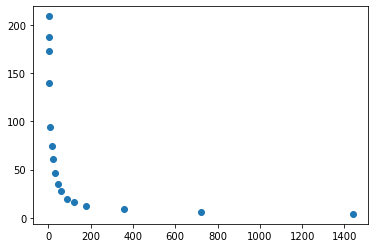

In [2]:
# Setup IDF data and dislay chart
durations = np.array([1, 2, 3, 5, 10, 15, 20, 30, 45, 60, 90, 120, 180, 360, 720, 1440]) # durations in minutes
intensities = np.array([581, 522, 481, 389, 263, 207, 170, 129, 96, 76, 55, 45, 35, 25, 17, 11]) # intensities in l/s*ha
# Convert intensities to mm/hr 
intensities = intensities * 0.36
plt.scatter(durations, intensities)


A = 1109.9133222559635
B = 5.446817651298049
C = 0.8864971489358662
R-squared = 0.9987396283452206


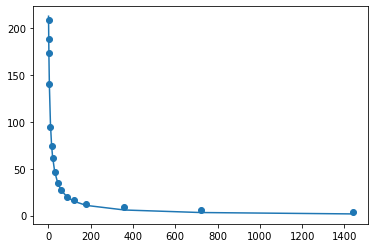

In [3]:
# Get the A, B, C parameters and plot the fitting curve
A, B, C, r2 = getABC(durations, intensities)
plt.scatter(durations, intensities)
plt.plot(durations, idf(durations, A, B, C))
print("A = {0}".format(A))
print("B = {0}".format(B))
print("C = {0}".format(C))
print("R-squared = {0}".format(r2))

In [4]:
# Create  Chicago design storm data - 2 hours long, with a 50% climate factor adjustment
dt, storm = makeChicagoStorm(120, 0.5, 5, A, B, C)
climate_factor = 1.5
storm = np.array(storm) * climate_factor
storm

array([  0.        ,   3.49325766,   3.84326127,   4.27186044,
         4.808165  ,   5.49725056,   6.41251747,   7.68129473,
         9.54335006,  12.50320316,  17.80644307,  29.41822472,
        68.03282403, 207.99548125,  68.03282403,  29.41822472,
        17.80644307,  12.50320316,   9.54335006,   7.68129473,
         6.41251747,   5.49725056,   4.808165  ,   4.27186044,
         3.84326127])

In [5]:
# Check total storm depth
print("Storm total = ", np.sum(storm)*5/60)
print("IDF total = ", 2 * idf(120, A, B, C) * climate_factor)

Storm total =  45.92712732715793
IDF total =  45.933741643796296


In [6]:
# Write to dfs0
stormToDfs0(r"./mystorm.dfs0",
            "My storm name",
            5,
            storm,
            datetime(2021, 1, 1, 12),
            datetime(2021, 1, 1, 18))

True